In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('C:\\Users\\teunj\\Desktop\\PyTest\\CBS_IE_formatted.xlsx')
df.head(10)

,Perioden,BrutoProductie_1,EigenVerbruikBijElektrProductie_2,NettoProductieTotaal_3,Kernenergie_4,BrandstoffenTotaal_5,Kolen_6,Olieproducten_7,Aardgas_8,Biomassa_9,...,VerenigdKoninkrijk_21,Noorwegen_22,UitvoerTotaal_23,Belgie_24,Denemarken_25,Duitsland_26,VerenigdKoninkrijk_27,Noorwegen_28,Distributieverliezen_29,NettoVerbruikBerekend_30
0,1929JJ00,NaN,NaN,NaN,NaN,.,.,.,NaN,.,...,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN,NaN
1,1930JJ00,NaN,NaN,NaN,NaN,.,.,.,NaN,.,...,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN,NaN
2,1931JJ00,NaN,NaN,NaN,NaN,.,.,.,NaN,.,...,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN,NaN
3,1932JJ00,NaN,NaN,NaN,NaN,.,.,.,NaN,.,...,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN,NaN
4,1933JJ00,NaN,NaN,NaN,NaN,.,.,.,NaN,.,...,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN,NaN
5,1934JJ00,NaN,NaN,NaN,NaN,.,.,.,NaN,.,...,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN,NaN
6,1935JJ00,NaN,NaN,NaN,NaN,.,.,.,NaN,.,...,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN,NaN
7,1936JJ00,3122.0,NaN,NaN,NaN,.,.,.,NaN,.,...,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN,NaN
8,1937JJ00,3485.0,NaN,NaN,NaN,.,.,.,NaN,.,...,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN,NaN
9,1938JJ00,3688.0,NaN,NaN,NaN,.,.,.,NaN,.,...,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN,NaN


In [3]:
# Here I dropped all the unrelevant columns in the data set as i will only be focusing on the Import and export of energy
to_drop= ['EigenVerbruikBijElektrProductie_2', 'NettoProductieTotaal_3','BrandstoffenTotaal_5','OverigeBrandstoffenNietHernieuwbaar_10','WindenergieOpLand_13','WindenergieOpZee_14','OverigeBronnen_16','NettoVerbruikBerekend_30','Kernenergie_4','Kolen_6','Olieproducten_7','Aardgas_8','Biomassa_9','Waterkracht_11','WindenergieTotaal_12','Zonnestroom_15']
df.drop(to_drop, inplace=True, axis=1)
df.head()

,Perioden,BrutoProductie_1,InvoerTotaal_17,Belgie_18,Denemarken_19,Duitsland_20,VerenigdKoninkrijk_21,Noorwegen_22,UitvoerTotaal_23,Belgie_24,Denemarken_25,Duitsland_26,VerenigdKoninkrijk_27,Noorwegen_28,Distributieverliezen_29
0,1929JJ00,NaN,22,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN
1,1930JJ00,NaN,23,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN
2,1931JJ00,NaN,20,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN
3,1932JJ00,NaN,18,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN
4,1933JJ00,NaN,21,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,0,NaN,NaN,NaN


In [4]:
#Renamed the columns to english, Replaced the missing values with 0, and added a column Net import for the difference
#between import and export.
new_names={'Perioden':'Timeframe',
                                                   'BrutoProductie_1':'Total_Production',
                                                   'InvoerTotaal_17':'Total_Import',
                                                   'Belgie_18':'Import_Belgium',
                                                   'Denemarken_19':'Import_Denmark',
                                                   'Duitsland_20':'Import_Germany',
                                                   'VerenigdKoninkrijk_21':'Import_UK',
                                                   'Noorwegen_22':'Import_Norway',
                                                   'UitvoerTotaal_23':'Total_Export',
                                                   'Belgie_24':'Export_Belgium',
                                                   'Denemarken_25':'Export_Denmark',
                                                   'Duitsland_26':'Export_Germany',
                                                   'VerenigdKoninkrijk_27':'Export_UK',
                                                   'Noorwegen_28':'Export_Norway',
                                                   'Distributieverliezen_29':'Energy_lost'}
df.rename(columns=new_names, inplace=True)
df.fillna(0, inplace=True)
df['Net_Import']= df['Total_Import']-df['Total_Export']
df.head()

,Timeframe,Total_Production,Total_Import,Import_Belgium,Import_Denmark,Import_Germany,Import_UK,Import_Norway,Total_Export,Export_Belgium,Export_Denmark,Export_Germany,Export_UK,Export_Norway,Energy_lost,Net_Import
0,1929JJ00,0.0,22,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,22
1,1930JJ00,0.0,23,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,23
2,1931JJ00,0.0,20,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,20
3,1932JJ00,0.0,18,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,18
4,1933JJ00,0.0,21,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,21


In [5]:
#select the last two characters as the month and the first 4 as the year
df['Year'] = df['Timeframe'].str[:4]
df['Month'] = df['Timeframe'].str[-2:]

# inspect only these 3 columns, to check
df[['Timeframe','Year','Month']].tail(10)

,Timeframe,Year,Month
623,2020MM05,2020,05
624,2020MM06,2020,06
625,2020MM07,2020,07
626,2020MM08,2020,08
627,2020MM09,2020,09
628,2020MM10,2020,10
629,2020MM11,2020,11
630,2020MM12,2020,12
631,2020JJ00,2020,00
632,2021MM01,2021,01


In [6]:
# now check a bit more seriously
df[['Year','Month']].dtypes

Year     object
Month    object
dtype: object

In [7]:
df['Year'] = pd.to_numeric(df['Year'])
df['Month'] = pd.to_numeric(df['Month'])

In [8]:
df[['Year','Month']].describe()
df.tail(15)

,Timeframe,Total_Production,Total_Import,Import_Belgium,Import_Denmark,Import_Germany,Import_UK,Import_Norway,Total_Export,Export_Belgium,Export_Denmark,Export_Germany,Export_UK,Export_Norway,Energy_lost,Net_Import,Year,Month
618,2019JJ00,121062.0,20403,4528.0,619.0,12238.0,385.0,2634.0,19548,6991.0,671.0,4398,6148.0,1340.0,5059.0,855,2019,0
619,2020MM01,11534.0,1746,57.0,463.0,921.0,47.0,260.0,2002,987.0,2.0,586,422.0,6.0,473.0,-256,2020,1
620,2020MM02,10304.0,1669,205.0,372.0,765.0,46.0,282.0,1508,500.0,46.0,478,476.0,8.0,424.0,161,2020,2
621,2020MM03,9959.0,2029,341.0,352.0,843.0,14.0,479.0,1764,466.0,49.0,655,574.0,20.0,436.0,265,2020,3
622,2020MM04,8289.0,2029,589.0,301.0,640.0,42.0,457.0,1508,255.0,78.0,663,490.0,22.0,394.0,521,2020,4
623,2020MM05,9476.0,1899,843.0,195.0,398.0,56.0,407.0,2244,264.0,159.0,1345,450.0,26.0,395.0,-345,2020,5
624,2020MM06,9139.0,1353,330.0,43.0,660.0,119.0,201.0,1386,361.0,229.0,535,254.0,8.0,389.0,-33,2020,6
625,2020MM07,10753.0,1154,272.0,140.0,348.0,84.0,309.0,2422,423.0,152.0,1543,294.0,10.0,409.0,-1268,2020,7
626,2020MM08,11022.0,1108,75.0,61.0,501.0,25.0,446.0,2286,703.0,238.0,956,388.0,1.0,388.0,-1178,2020,8
627,2020MM09,10127.0,1427,143.0,155.0,646.0,21.0,462.0,1938,890.0,101.0,622,323.0,3.0,400.0,-511,2020,9


In [9]:
df['Energy_lost'] = df['Energy_lost'].astype(int)

In [25]:
Years=df[df.Month == 0]
Range= (Years['Year'] >= 2000) & (df['Year'] <= 2020)
Range_2 = Years['Net_Import']
print(Range)
print(Range_2)

0      False
1      False
2      False
3      False
4      False
       ...  
628    False
629    False
630    False
631     True
632    False
Name: Year, Length: 633, dtype: bool
0        22
1        23
2        20
3        18
4        21
       ... 
579    4915
592    3506
605    7970
618     855
631   -2660
Name: Net_Import, Length: 92, dtype: int64


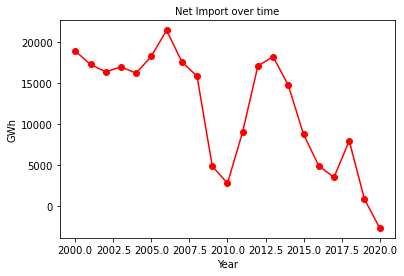

In [26]:
#Graph shows net import over time. Only works with indexes for now need to change so I can specify a range of years or months
plt.plot(df[Range]['Year'], df[Range]['Net_Import'], color='red', marker='o')
plt.title('Net Import over time', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('GWh', fontsize=10)
plt.grid(False)
plt.show()

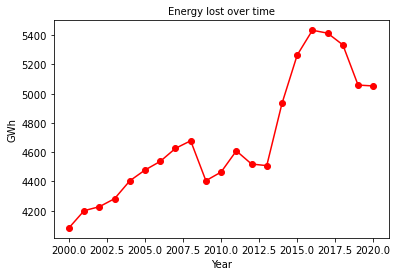

In [27]:
#shows Energy lost trough import and export

plt.plot(df[Range]['Year'],df[Range]['Energy_lost'], color='red', marker='o')
plt.title('Energy lost over time', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('GWh', fontsize=10)
plt.grid(False)
plt.show()